In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [2]:
data_train = pd.read_csv('D:/ML/training_data.csv')
data_test = pd.read_csv('D:/ML/test_data.csv')

In [3]:
data_train = data_train.iloc[:,1:2].values
data_test = data_test.iloc[:,1:2].values

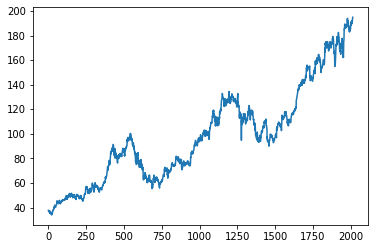

In [4]:
plt.plot(data_train)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.fit_transform(data_test)

In [6]:
data_train_scaled

array([[0.022744  ],
       [0.02011732],
       [0.01584005],
       ...,
       [0.98801121],
       [0.9976395 ],
       [1.        ]])

MinMaxScaler?

In [7]:
m_train, n_train = data_train.shape
m_test, n_test = data_test.shape 
t_step = 60
y_train = list()
x_train = list()
for i in range(t_step,m_train):
    # Create temporary samples
    sample_x_train = data_train_scaled[i-t_step:i]
    sample_y_train = data_train_scaled[i]
    
# Let’s add a padding
    # for sample size less than 60
    if sample_x_train.shape[0] < t_step:
        #we add an array of size (60-sample size, 1) one column
        var = np.zeros((t_step - sample_x_train.shape[0]),1)
        #and append it to the sample
        sample_x_train = np.concatenate((sample_x_train, var), axis = 0)
        sample_y_train = np.concatenate((sample_y_train, var), axis = 0)
    # Adding to the lists x_train, y_train
    x_train.append(sample_x_train)
    y_train.append(sample_y_train)
x_train = np.array(x_train)
y_train = np.array(y_train)

In [8]:
x_train.shape

(1955, 60, 1)

In [9]:
y_test = list()
x_test = list()
for i in range(t_step,n_test):
    # Create temporary samples
    sample_x_test = data_test_scaled[i-t_step:i]
    sample_y_test = data_test_scaled[i]
    
# Let’s add a padding
    # for sample size less than 60
    if sample_x_test.shape[0] < t_step:
        #we add an array of size (60-sample size, 1) one column
        var = np.zeros((t_step - sample_x_test.shape[0]),1)
        #and append it to the sample
        sample_x_test = np.concatenate((sample_x_test, var), axis = 0)
        sample_y_test = np.concatenate((sample_y_test, var), axis = 0)
    # Adding to the lists x_test, y_test
    x_test.append(sample_x_test)
    y_test.append(sample_y_test)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [10]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'tanh', return_sequences = True, batch_size = (None, t_step, 1) ))
model.add(Dropout(0.1))
model.add(LSTM(units= 50, activation = 'tanh', return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(units=1))

In [11]:
from keras.optimizers import Adam
learning_rate = 0.5
adam = Adam(learning_rate)
model.compile(loss='MSE',optimizer = adam, metrics = ['accuracy'])

In [12]:
nb_epoch = 10
batch_size = 300
model.fit(x_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose = 1)

Epoch 1/10
7/7 [==============================] - 1s 126ms/step - loss: 85.0860 - accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 1s 123ms/step - loss: 28.7776 - accuracy: 5.1151e-04
Epoch 3/10
7/7 [==============================] - 1s 122ms/step - loss: 14.4673 - accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 1s 117ms/step - loss: 7.6175 - accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 1s 119ms/step - loss: 4.0400 - accuracy: 0.0000e+00
Epoch 6/10
7/7 [==============================] - 1s 118ms/step - loss: 2.2690 - accuracy: 0.0000e+00
Epoch 7/10
7/7 [==============================] - 1s 118ms/step - loss: 1.1180 - accuracy: 0.0000e+00
Epoch 8/10
7/7 [==============================] - 1s 117ms/step - loss: 0.5071 - accuracy: 5.1151e-04
Epoch 9/10
7/7 [==============================] - 1s 118ms/step - loss: 0.3013 - accuracy: 5.1151e-04
Epoch 10/10
7/7 [==============================] - 1s 118ms/step - loss: 0.2388

In [14]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose = 1)

Epoch 1/10
7/7 [==============================] - 1s 115ms/step - loss: 0.1359 - accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 1s 119ms/step - loss: 0.1075 - accuracy: 5.1151e-04
Epoch 3/10
7/7 [==============================] - 1s 120ms/step - loss: 0.0892 - accuracy: 5.1151e-04
Epoch 4/10
7/7 [==============================] - 1s 121ms/step - loss: 0.0735 - accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 1s 124ms/step - loss: 0.0687 - accuracy: 5.1151e-04
Epoch 6/10
7/7 [==============================] - 1s 118ms/step - loss: 0.0631 - accuracy: 5.1151e-04
Epoch 7/10
7/7 [==============================] - 1s 119ms/step - loss: 0.0617 - accuracy: 0.0000e+00
Epoch 8/10
7/7 [==============================] - 1s 117ms/step - loss: 0.0626 - accuracy: 0.0000e+00
Epoch 9/10
7/7 [==============================] - 1s 120ms/step - loss: 0.0625 - accuracy: 0.0000e+00
Epoch 10/10
7/7 [==============================] - 1s 124ms/step - loss: 0.0605 - 